## Exercise 0

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from time import time
from utils import *
# To access the functions of this notebook, ctrl + click on them

### Exercise 0.1

Write a method that generates P balanced random patterns $p^{\mu} \in \{ -1, 1 \}^N$, each containing an
equal number of +1s and −1s.

In [2]:
# Example
P = 50
N = 3000

patterns = gen_balanced_patterns(P,N)

print(patterns.shape)

(50, 3000)


### Exercise 0.2

Write a method that computes the next state $S(t + 1)$ of the network, given the current state $S(t) = (S_1(t), . . . , S_N (t))$ and a set of patterns $p^1, . . . , p^P$, according to Eqs. 1-2.


### Exercise 0.3

In [3]:
# Time comparison

S = np.ones((N,1))

start = time()

next = next_state(S, patterns)

stop = time()

acc_next, _ = acc_next_state(S, patterns)

end = time()

print('Time first alg :', stop - start)
print('Time 2nd alg :', end - stop)


Time first alg : 0.04770302772521973
Time 2nd alg : 0.0044748783111572266


## Exercise 1

### Exercise 1.1

In [4]:
# Create Hopfield network
patterns = gen_balanced_patterns(P=5, N=300)
S = patterns[0].copy()

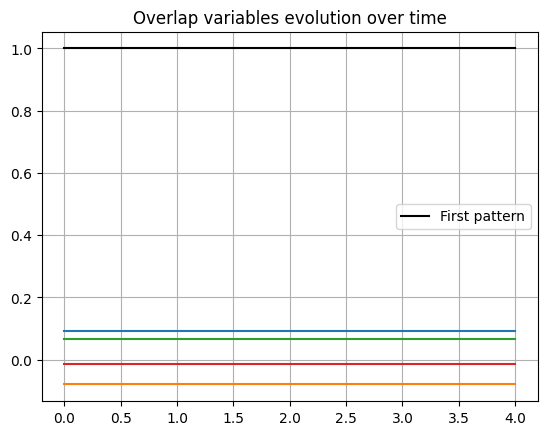

In [5]:

m_list = []
T = 5

for t in np.arange(T) :
    S, m = acc_next_state(S, patterns)
    m_list.append(m)
m_list = np.array(m_list)

plot_overlap_variables(T, m_list)

# Change display to make it cleaner
# All variables stay constant over time, since the state is equal to one pattern 
# it stays where it is and there's no update
# overlap variable is 1 where the pattern is exactly equal to the state,
# here since S = patterns[0] then the first overlap variable is 1
# This plot is useful to compare all the patterns to the first pattern


### Exercise 1.2

In [6]:
patterns = gen_balanced_patterns(P=200, N=300)
S = patterns[0].copy()

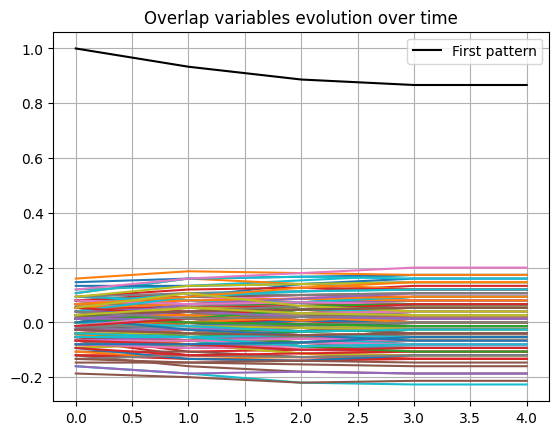

In [7]:
m_list = []
T = 5

for t in np.arange(T) :
    S, m = acc_next_state(S, patterns)
    m_list.append(m)
m_list = np.array(m_list)
# print(m_list)
plot_overlap_variables(T, m_list)

### Exercise 1.3

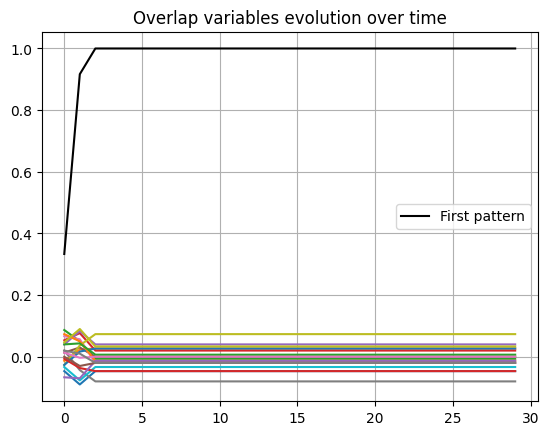

In [8]:
patterns = gen_balanced_patterns(P=20, N=600)
S = patterns[0].copy()
idx_flip = np.random.choice(600, size=200, replace=False)
S[idx_flip] *= -1
m_list = []
T = 30

for t in np.arange(T) :
    S, m = acc_next_state(S, patterns)
    m_list.append(m)
m_list = np.array(m_list)
# print(m_list)
plot_overlap_variables(T,m_list)

### Exercise 1.4

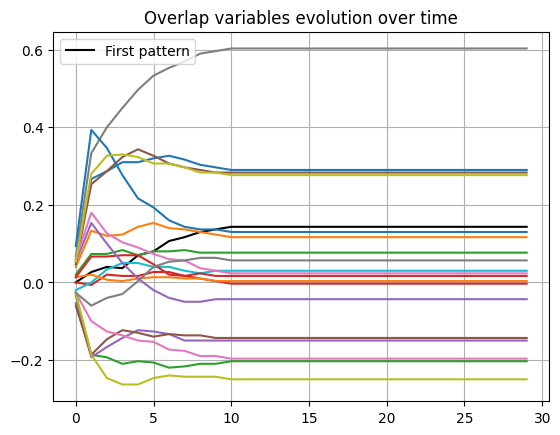

In [9]:
patterns = gen_balanced_patterns(P=20, N=600)
S = patterns[0].copy()
idx_flip = np.random.choice(600, size=300, replace=False)
S[idx_flip] *= -1

m_list = []
T = 30

for t in np.arange(T) :
    S, m = acc_next_state(S, patterns)
    m_list.append(m)
m_list = np.array(m_list)
plot_overlap_variables(T,m_list)

### Exercise 1.5

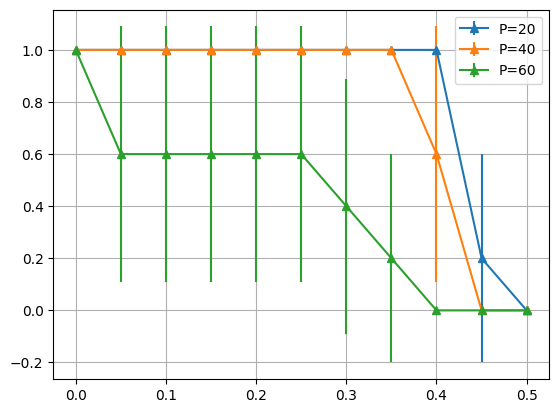

In [59]:
n_flip = np.array([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300])
P_list = np.array([20,40,60])
iter = 5
N = 600 # Not specified but assuming it's the same as for 1.3 and 1.4
T = 30 # Again assuming it's the same as above

# This array will contain every number of correctly retrieved patterns for every pattern number,
# for every n_flip, for every iteration
correct_array = np.zeros((iter, P_list.shape[0], n_flip.shape[0]))

for i in np.arange(iter) :
    for P_idx, P in enumerate(P_list) :
        patterns = gen_balanced_patterns(P,N)
        for n_idx, n in enumerate(n_flip) :
            S = patterns[0].copy() # Again assuming init state is this one, but flipped
            idx_flip = np.random.choice(N, size=n, replace=False)
            S[idx_flip] *= -1
            for t in np.arange(T) :
                S, m = acc_next_state(S, patterns)
            
            # print(m)
            # Here, m = overlap variables for all patterns at the last iteration
            # Check number of correctly retrieved patterns
            # An inequality condition was used because strict equality did not work
            # because of representation differences
            correct = (m >= 1).sum()

            # Assign this value to the array
            correct_array[i,P_idx,n_idx] = correct

# Compute statistics on the iteration level of the array
mean_array = np.mean(correct_array, axis=0)
std_array = np.std(correct_array,axis=0)
# print(correct_array)

# x-axis
x = n_flip / N
# print(x.shape)
# print(mean_array.shape)
# print(std_array.shape)

plt.figure()
for i,p in enumerate(P_list) :
    plt.errorbar(x, y=mean_array[i], yerr=std_array[i], marker='^', label=f'P={p}')

plt.grid()
plt.legend()
plt.show()

### Exercise 1.6

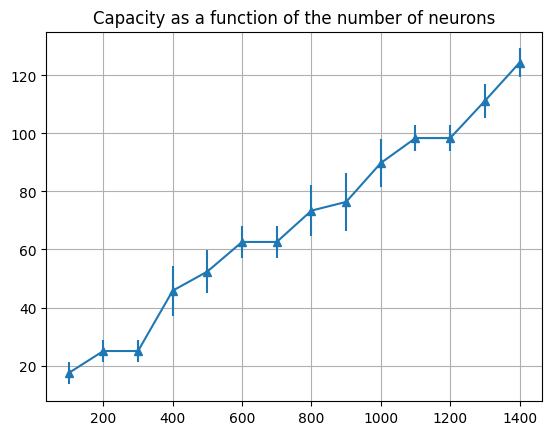

In [70]:

iter = 5
N_list = np.arange(100,1500,100)
T = 30 

# This array will contain every number of correctly retrieved patterns for every pattern number,
# for every n_flip, for every iteration
capacity_array = np.zeros((iter, N_list.shape[0]))

for i in np.arange(iter) :
    P = 1
    for N_idx, N in enumerate(N_list) :
        max_P = 0
        while max_P == 0 :
            patterns = gen_balanced_patterns(P,N)
            S = patterns[0].copy()
            for t in np.arange(2) :
                S, m = acc_next_state(S, patterns)
            if m[0] < 1 :
                # print('found it !', m[0], P)
                max_P = P
                capacity_array[i,N_idx] = max_P
            else :
                P+= 1

# Compute statistics on the iteration level of the array
mean_array = np.mean(capacity_array, axis=0)
std_array = np.std(capacity_array,axis=0)

capacity_array /= N_list
plt.figure()
plt.title('Capacity as a function of the number of neurons')
plt.errorbar(N_list, y=mean_array, yerr=std_array, marker='^')
plt.grid()
plt.show()

## Exercise 2